In [5]:
import json
import pandas as pd

# Load the JSON data
file_path = 'yelp_dataset/yelp_academic_dataset_review.json'

# Reading the JSON data
with open(file_path, 'r', encoding='utf-8') as file:
    data = [json.loads(line) for line in file]

# Converting to a DataFrame for easier analysis
df = pd.DataFrame(data)

# Displaying the first few rows of the DataFrame to understand its structure
df.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


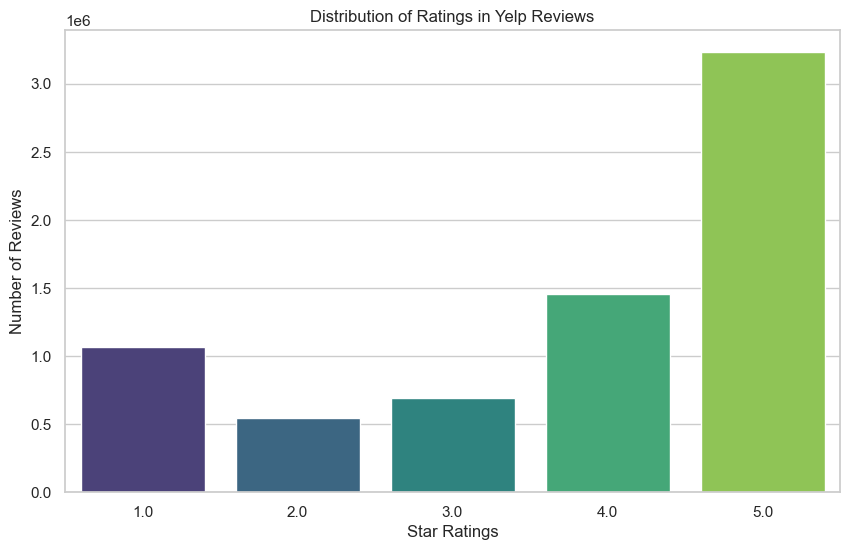

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a bar plot for the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='stars', data=df, palette='viridis')
plt.title('Distribution of Ratings in Yelp Reviews')
plt.xlabel('Star Ratings')
plt.ylabel('Number of Reviews')
plt.show()


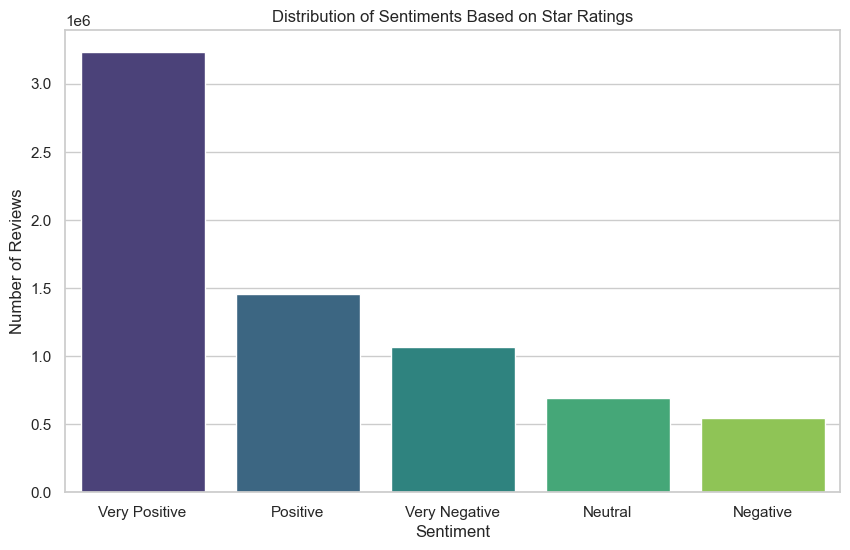

In [13]:
# Classifying reviews according to the stars
df['sentiment'] = df['stars'].map({1: 'Very Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Very Positive'})

# Counting the number of reviews in each sentiment category
sentiment_distribution = df['sentiment'].value_counts()

# Visualizing the distribution of sentiments
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette='viridis')
plt.title('Distribution of Sentiments Based on Star Ratings')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


In [14]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Check the range of dates in the dataset
date_range = df['date'].agg(['min', 'max'])
date_range


min   2005-02-16 03:23:22
max   2022-01-19 19:48:45
Name: date, dtype: datetime64[ns]

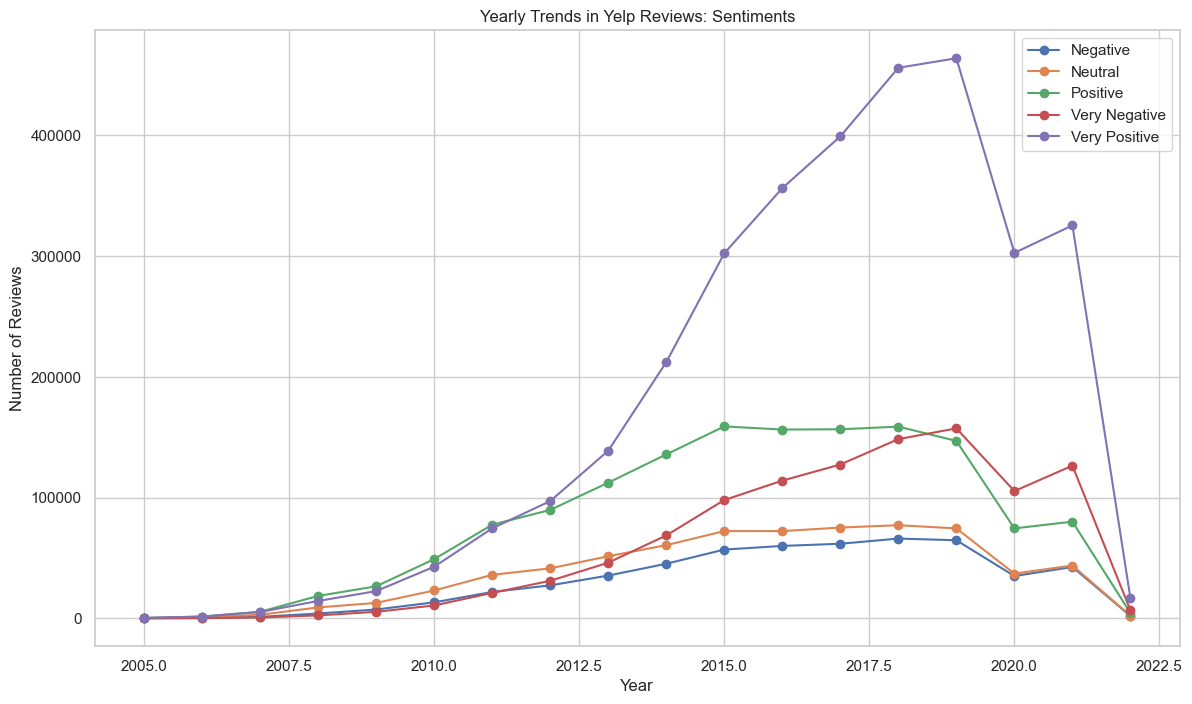

In [23]:
# Extracting year from the date for the sentiment analysis
df['year'] = df['date'].dt.year

# Grouping by year and revised sentiment
yearly_sentiment_distribution = df.groupby(['year', 'sentiment']).size().unstack(fill_value=0)

# Plotting the temporal graph for revised sentiments
plt.figure(figsize=(14, 8))

# Plotting each sentiment category
for sentiment in yearly_sentiment_distribution.columns:
    plt.plot(yearly_sentiment_distribution[sentiment], label=sentiment, marker='o')

plt.title('Yearly Trends in Yelp Reviews: Sentiments')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
# Grouping by star rating and summing the counts of 'useful', 'funny', and 'cool' tags
tags_by_stars = df.groupby('stars').agg(
    total_useful=('useful', 'sum'),
    total_funny=('funny', 'sum'),
    total_cool=('cool', 'sum')
).sort_index(ascending=False)  # Sorting by star ratings in descending order

tags_by_stars


,total_useful,total_funny,total_cool
stars,,,
5.0,3142914,769090,1773195
4.0,1793423,552487,1079434
3.0,817203,276943,326897
2.0,737035,232216,140806
1.0,1790173,452007,165144


In [26]:
# Function to classify if a review has interactions or not
df['has_interaction'] = df[['useful', 'funny', 'cool']].sum(axis=1) > 0

# Group by star rating and count reviews with and without interactions
interaction_counts = df.groupby(['stars', 'has_interaction']).size().unstack(fill_value=0)
interaction_counts.columns = ['No Interactions', 'With Interactions']

# Sorting by star ratings
interaction_counts = interaction_counts.sort_index(ascending=False)

interaction_counts


,No Interactions,With Interactions
stars,,
5.0,1753585,1478042
4.0,688202,764716
3.0,327906,364028
2.0,236378,307862
1.0,437171,632390


In [29]:
# To get general information about the DataFrame:
# 1. Number of rows and columns
num_rows, num_columns = df.shape

# 2. Column names
column_names = df.columns.tolist()

# 3. Data types of columns
data_types = df.dtypes

# 4. Summary statistics (mean, min, max, etc.) for numeric columns
summary_stats = df.describe()

# 5. Number of non-null values in each column
non_null_counts = df.count()

# 6. Total memory usage by the DataFrame
memory_usage = df.memory_usage(deep=True).sum()

# Print the information
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')
print(f'Column names: {column_names}')
print(f'Data types:\n{data_types}')
print(f'Summary statistics:\n{summary_stats}')
print(f'Non-null counts:\n{non_null_counts}')
print(f'Total memory usage: {memory_usage} bytes')

Number of rows: 6990280
Number of columns: 12
Column names: ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date', 'year', 'sentiment', 'has_interaction']
Data types:
review_id                  object
user_id                    object
business_id                object
stars                     float64
useful                      int64
funny                       int64
cool                        int64
text                       object
date               datetime64[ns]
year                        int32
sentiment                  object
has_interaction              bool
dtype: object
Summary statistics:
              stars        useful         funny          cool  \
count  6.990280e+06  6.990280e+06  6.990280e+06  6.990280e+06   
mean   3.748584e+00  1.184609e+00  3.265596e-01  4.986175e-01   
min    1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
25%    3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    4.000000e+00  0.000000

In [ ]:
def extract_first_entries(input_file, output_file, limit=500):
    with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', encoding='utf-8') as outfile:
        for i, line in enumerate(infile):
            if i < limit:
                data = json.loads(line)
                json.dump(data, outfile)
                outfile.write('\n')
            else:
                break

input_file = 'yelp_dataset/yelp_academic_dataset_review.json'
output_file = 'yelp_dataset/yelp_academic_dataset_review_first_500.json'

extract_first_entries(input_file, output_file)